### Import the opencv libraries

In [34]:
#opencv libraries
import cv2

In [35]:
img_path='/content/drive/MyDrive/SM_Interaction/LMP/computer_vision/Computer_Vision_data/'

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#read the image file 
image = cv2.imread(img_path+'/Images/people1.jpg')

In [38]:
#this image 1280 wide 1920 height 3 rgb channels
#RGB three channels
image.shape

(1280, 1920, 3)

In [39]:
#import the google colab patches for cv2_imshow
from google.colab.patches import cv2_imshow
cv2_imshow(image)
#google colab imshow


Output hidden; open in https://colab.research.google.com to view.

In [40]:
#resize the image
image = cv2.resize(image,(800,600))
#now check the image shape
image.shape

(600, 800, 3)

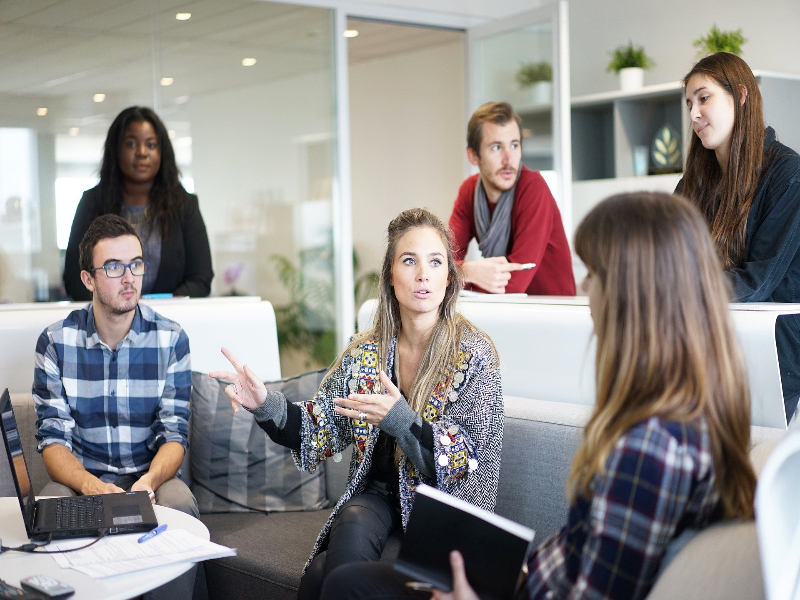

In [41]:
#again we can check the image with its size
cv2_imshow(image)

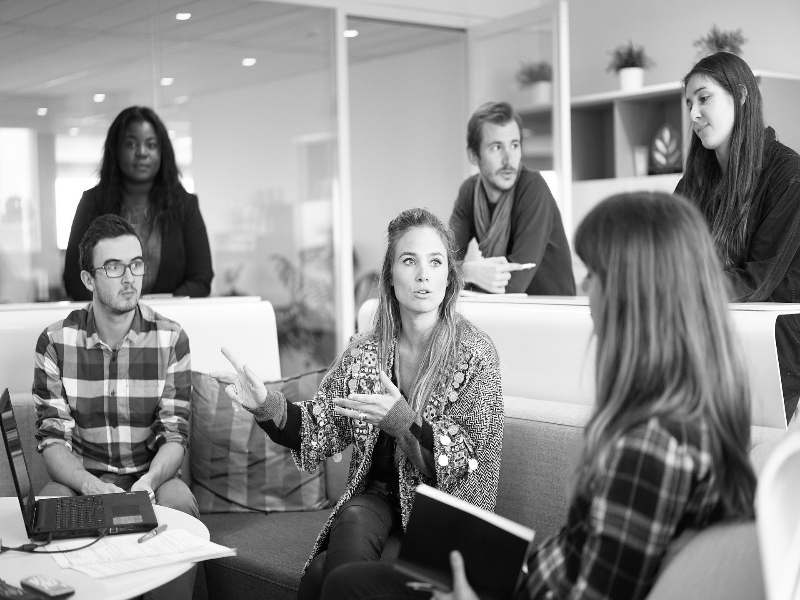

In [42]:
#converting to grayscale image
#total size of the image is 
(800*600*3, 800*600*1,1440000-480000)
#converting color images to greyScale
img_converting_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(img_converting_grey)

In [43]:
#now compare the shape
#the difference between two shapes
(image.shape,img_converting_grey.shape)

((600, 800, 3), (600, 800))

### Detecting Faces with casecade classifier

In [44]:
#add the harecasecade classifier model from the directory
#in order to detect the faces with adaboost classifier
face_detector = cv2.CascadeClassifier(img_path+'/Cascades/haarcascade_frontalface_default.xml')

In [45]:
detections = face_detector.detectMultiScale(img_converting_grey)

In [46]:
#6 faces are detected.
detections

array([[677,  72,  68,  68],
       [115, 124,  53,  53],
       [475, 123,  59,  59],
       [387, 233,  73,  73],
       [ 92, 239,  66,  66],
       [390, 323,  56,  56]], dtype=int32)

In [47]:
#get the image length 
len(detections)

6

### HaarcaseCade Parameters - 1

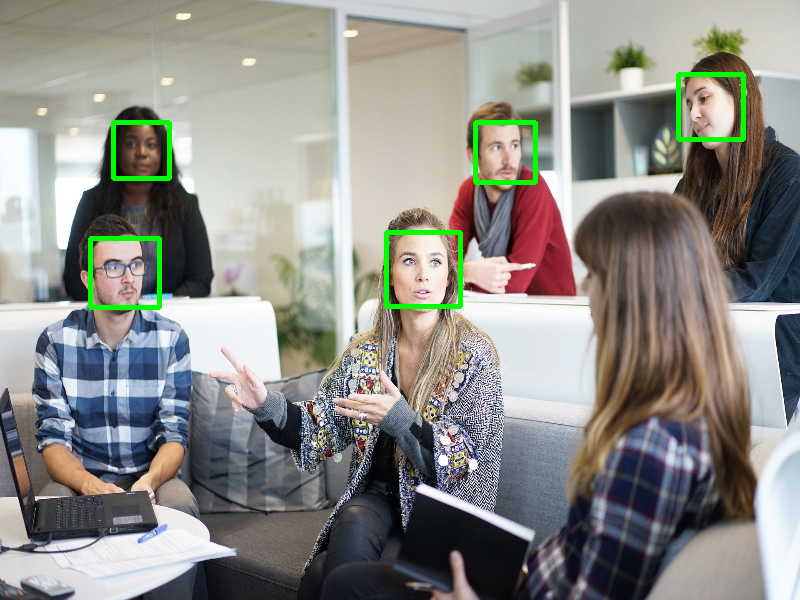

In [60]:
#each one of its value
#x=677,y=72,w=68,h=68
#scaleFactor greater than 1
#first we are going to load our model
face_detector = cv2.CascadeClassifier(img_path+'/Cascades/haarcascade_frontalface_default.xml')
#this is our image path
image = cv2.imread(img_path+'/Images/people1.jpg')
#now we can resize the image
image = cv2.resize(image,(800,600))
#then we converting the image to grey scale mode
img_converting_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#now wr can add our detectMultiScale mode with scale factor
#scaleFactor we are using due to avoid false postive
detections = face_detector.detectMultiScale(img_converting_grey,scaleFactor=1.09)
#now this is our detection mode
for(x,y,w,h) in detections:
   #print(x,y,w,h)
   #cv2.rectangle(image,(x,y),(x,y),(0,255,0),2)
   cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
cv2_imshow(image)

### HaarcaseCade Parameters - 2

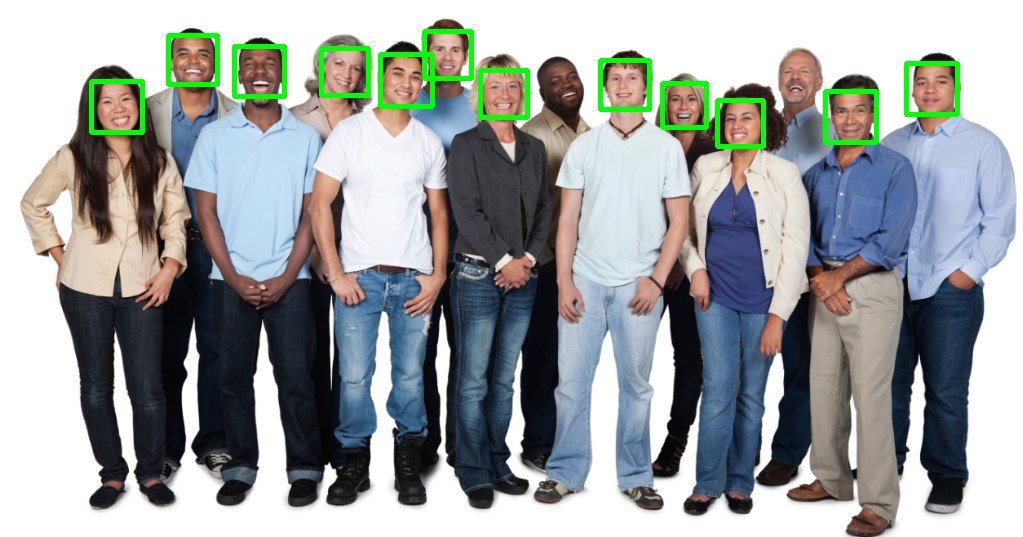

In [71]:

face_detector = cv2.CascadeClassifier(img_path+'/Cascades/haarcascade_frontalface_default.xml')
image = cv2.imread(img_path+'/Images/people2.jpg')
img_converting_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#minNeighbors indicates number of neighbours, the final rectangle generates, 
#5 means we need 5 candidate
# mean neighbours higher the value the higher the quality of predictions
detections = face_detector.detectMultiScale(
    img_converting_grey,
    scaleFactor=1.2, 
    minNeighbors=7,
    minSize=(20,20),
    maxSize=(100,100)
)
for(x,y,w,h) in detections:
   #print(w,h)
   cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
cv2_imshow(image)

### Eye & face Detections

In [85]:
face_detector = cv2.CascadeClassifier(img_path+'/Cascades/haarcascade_frontalface_default.xml')
eye_detector = cv2.CascadeClassifier(img_path+'/Cascades/haarcascade_eye.xml')
image = cv2.imread(img_path+'/Images/people1.jpg')
#image = cv2.resize(image,(800,600))
print(image.shape)
img_converting_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
face_detections = face_detector.detectMultiScale(img_converting_grey,scaleFactor=1.3,minSize=(30,30))
#lots of false positive
eye_detections = eye_detector.detectMultiScale(img_converting_grey,scaleFactor=1.1,minNeighbors=10,maxSize=(70,70))
for(x,y,w,h) in face_detections:
   cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
for(x,y,w,h) in eye_detections:
   cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.